# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 6: Prediction using Decision Tree Algorithm

### Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly. 

### 1. Importing the required header files 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

### 2. Reading the data

In [2]:
#Dataset : https://bit.ly/3kXTdox

#Reading the csv file using pandas library
data = pd.read_csv('Iris.csv')
#Printing shape of data
print(data.shape)
#Displaying 5 records
data.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


* There are only 150 records and 6 features in our dataset, in which 4 features are independent and one is dependent feature i.e. Species.
* Fetaure Id is just unique value for all etries, hence this feature is not required.

In [3]:
#Removing Id feature
data = data.drop('Id', axis=1)

In [ ]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* There are total of 150 entries in data and all are not null.

In [ ]:
#Basic description about the data such as count, mean, std, etc.
#The below details is only for numerical fields of data(In our case all columns are numerical). 
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#correlation between features
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [ ]:
print('There are 3 unique classes which are:',set(data['Species'].values))

There are 3 unique classes which are: {'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'}


In [ ]:
print(data['Species'].value_counts())       # data-points for class Species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


* As we can see each class has same number of data-points, hence our data is fully balanced.

### 3. Preparing the data

In [4]:
#Picking features and class variable
y = data['Species'].values
x = data.drop('Species', axis=1)

In [5]:
#Encoding the class label y because ML model only understands number

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(y)

In [6]:
#Splitting the data into train and test set

from sklearn.model_selection import train_test_split

#Keeping test size 0.2 means 20% of data will be used for testing the model.
#stratify split ensures that data is splitted in balanced manner between train and test set.
#This is very useful specially in case of highly imbalanced data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

### 4. Training the DecisionTreeClassifier Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Returning the accuracy of the model on train and unseen test data 

print('Accuracy on train data:',dt.score(x_train, y_train))
print('Accuracy on test data:',dt.score(x_test, y_test))

Accuracy on train data: 1.0
Accuracy on test data: 0.9666666666666667


Decision Tree has the tendency to memorise the training data which may leads to overfitting.


* Getting 100% accuracy for train and 96.67% for test dataset.
* Also there is not much difference between train and test accuracy so our model is neither overfitting nor underfitting.
* Most of classification models yield incredibly good results on Iris dataset because Iris is very predictable.
* We can observe that there are relatively few features in the Iris dataset.
* Moreover, if we look at the dataset description we can see that two of the features are very highly correlated with the class outcomes.
* These correlation values are linear, single-feature correlations, which indicates that one can most likely apply a linear model and observe good results.
* Decision Tree is non-linear but this works on both linear as well as non-linear data.
* Still lets do hyper-parameter tuning to optimize the model performance.

### 5. Hyper-tuning the DecisionTreeClassifier Model

In [ ]:
from sklearn.model_selection import GridSearchCV

para = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[1,2,3,4,5,6,7,8,9,10]}
cv = GridSearchCV(dt, para, n_jobs=-1)
cv.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
#Best hyper-parameter
cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [ ]:
#Accuracy on test data with hyper-tuned DT model

print('Accuracy on train data with hyper-tuned model:',cv.score(x_train, y_train))
print('Accuracy on test data with hyper-tuned model:',cv.score(x_test, y_test))

Accuracy on train data with hyper-tuned model: 0.9666666666666667
Accuracy on test data with hyper-tuned model: 0.9333333333333333


* For best hyper-tuned model we are getting 96.67% accuracy for train set and 93.33 for test set.
* So, we can say this model is optimal model for Iris classification because usually very high accuracy leads to overfitting.
* Also, we know that our data is fully balanced so accuracy metric will work here.

### 6. Visualizing the Decision Tree

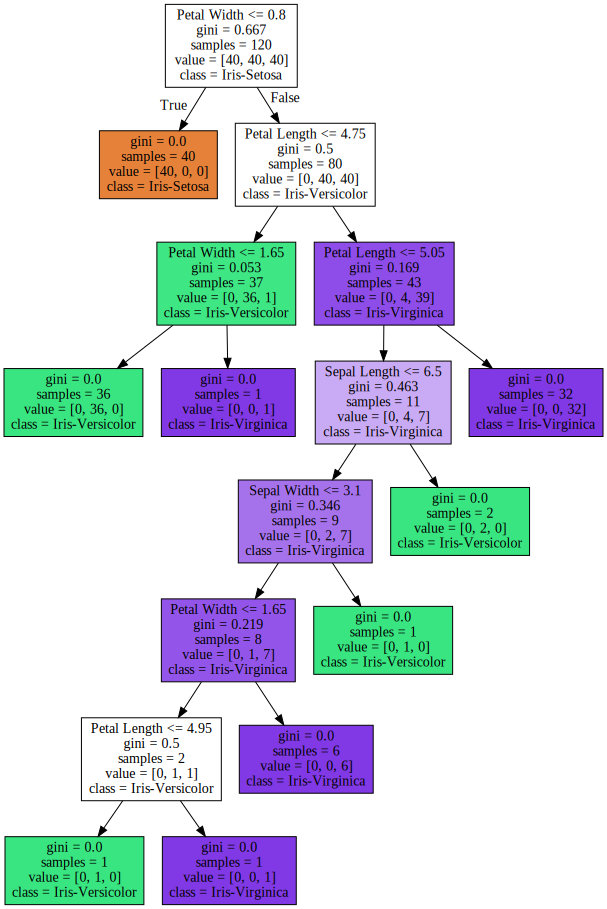

In [ ]:
import graphviz
from sklearn import tree

feat = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
cls =  ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']
decitree = tree.export_graphviz(dt, feature_names = feat, class_names=cls, filled=True)
dtree = graphviz.Source(decitree, format="png") 
dtree

### 7. Testing model to check if we feed any new data to this classifier, it would be able to predict the right class or not

In [ ]:
#Printing predicted and actual class labels

print('-'*25)
print('Predicted\tActual')
print('-'*25)
print('-'*25)
for i,j in zip(cv.predict(x_test)[:10],y_test[:10]):
  print(i,'\t\t',j)
  print('-'*25)

-------------------------
Predicted	Actual
-------------------------
-------------------------
2 		 2
-------------------------
0 		 0
-------------------------
0 		 0
-------------------------
0 		 0
-------------------------
1 		 1
-------------------------
0 		 0
-------------------------
1 		 1
-------------------------
2 		 1
-------------------------
2 		 1
-------------------------
2 		 2
-------------------------


* We can see most of the predictions are accurate.

In [12]:
def classify_iris():
  '''
  This function takes sepal length,width and petal length,width of iris flower and returns its type.
  '''
  #Taking inputs
  print('Enter sepal length:')
  sl = float(input())
  print('Enter sepal width:')
  sw = float(input())
  print('Enter petal length:')
  pl = float(input())
  print('Enter petal width:')
  pw = float(input())
  #Predicting the class of iris
  pred = cv.predict([[sl,sw,pl,pw]])[0]
  print()
  if pred == 0:
    print('The given flower is Iris-Setosa.')
  elif pred == 1:
    print('The given flower is Iris-Versicolor.')
  elif pred == 2:
    print('The given flower is Iris-Verginica.')

In [ ]:
classify_iris()

Enter sepal length:
2.5
Enter sepal width:
6.2
Enter petal length:
4
Enter petal width:
2.7

The given flower is Iris-Verginica.


In [14]:
classify_iris()

Enter sepal length:
2.6
Enter sepal width:
3.1
Enter petal length:
4.5
Enter petal width:
5.2

The given flower is Iris-Versicolor.


* As we have tested that one can now feed any new data to this classifer and it would be able to predict the right class accordingly.

### 8. Conclusion

* Feature petal length and width is most imprtant feature for classification task in iris dataset.
* Visualized the DecisionTree graphically.
* DecisionTreeClassifier is able to predict class with any new data.